<div style='background-color:#1155CC'>
<br>
<img src='https://elearning.bisaai.id/pluginfile.php/1/theme_edumy/headerlogo_mobile/-1/Logo%20app.png' width='100' height='100'>
<p style='text-align:center; font-size:200%; color:white; font-weight:bold'>Studi Independen Bersertifikat - Bisa AI Academy</p><p style='text-align:center; font-size:200%; color:white; font-weight:bold'>Machine Learning</p><br>
<p style='text-align:center; font-size:150%; color:white; font-weight:500'>Andrean Yonathan - Universitas Diponegoro</p>
<br>
</div>

# Import Library

In [1]:
import pandas as pd
import numpy as np
from math import sqrt

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 30)

# DATA UNDERSTANDING

## load dataset

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## check data info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## describe dataset

In [4]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## check missing values

In [5]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# EDA

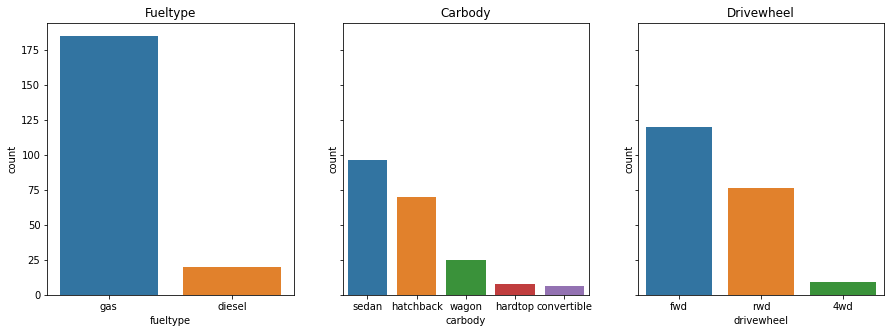

In [6]:
fig, ax = plt.subplots(1, 3, figsize = (15,5), sharey = True)
feature = ['fueltype', 'carbody', 'drivewheel']
for i, j in enumerate(feature):
    sns.countplot(x = j, data = df, order = df[j].value_counts().index, ax = ax[i])
    ax[i].set_title(f'{j.title()}')
plt.show()

## Analisis

* Lebih dari 175 mobil menggunakan bahan bakar gas
* Body mobil yang paling banyak adalah sedan
* Sebagian besar mobil menggunakan sistem penggerak fwd

## check correlation

In [7]:
# numerik column
cols_num = []
for col in df.columns:
    if df[col].dtype == ('float64'):
        cols_num.append(col)
    elif df[col].dtype == 'int64':
        cols_num.append(col)
    else:
        pass

In [8]:
# categorical column
cols_cat = []
for col in df.columns:
    if df[col].dtype == 'object':
        cols_cat.append(col)

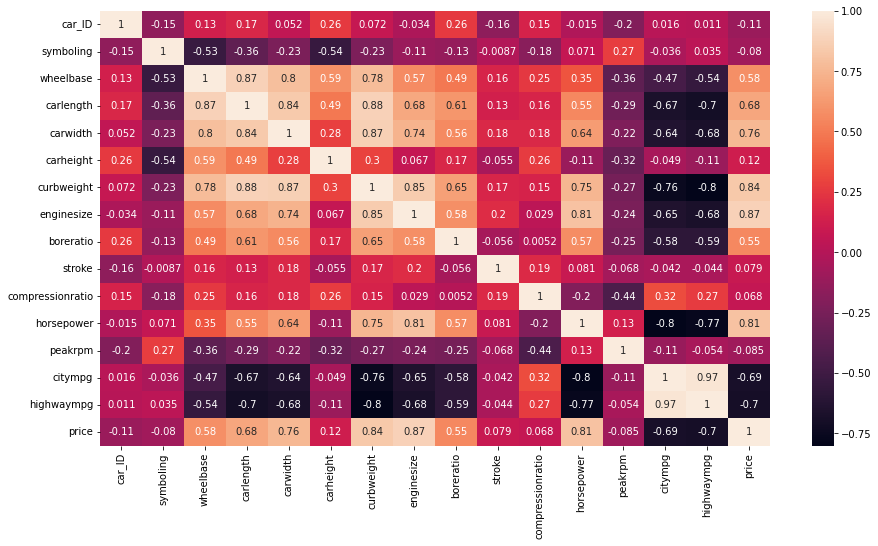

In [9]:
plt.figure(figsize = (15,8))
sns.heatmap(data = df[cols_num].corr(), annot = True)
plt.show()

## mengambil variabel yang memiliki korelasi positif tinggi terhadap price

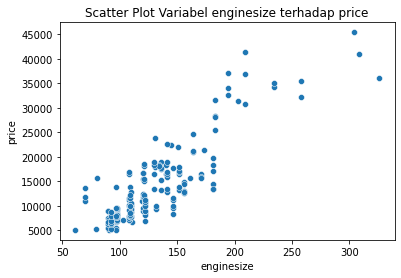

In [10]:
sns.scatterplot(x = 'enginesize', y = 'price', data = df)
plt.title('Scatter Plot Variabel enginesize terhadap price')
plt.show()

# Pemodelan

## split dataset

In [11]:
X = np.array(df['enginesize']).reshape(-1,1)
Y = np.array(df['price']).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

## 1. Simple Linear Regression

## training model

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

print('intercept:', model.intercept_[0])
print('coeficient:', model.coef_[0][0])

intercept: -8549.50732211409
coeficient: 172.0844765220189


## melakukan prediksi

In [13]:
y_pred = model.predict(X_test)
print(y_pred)

[[22941.95188142]
 [ 3496.40603443]
 [ 7282.26451791]
 [12444.79881357]
 [22597.78292837]
 [ 7282.26451791]
 [ 8142.68690052]
 [12444.79881357]
 [10207.70061879]
 [ 7282.26451791]
 [16574.8262501 ]
 [ 3496.40603443]
 [24834.88112316]
 [10207.70061879]
 [10035.61614226]
 [10379.78509531]
 [ 8314.77137704]
 [35848.28762057]
 [ 7110.18004139]
 [ 8142.68690052]
 [ 8314.77137704]
 [14165.64357879]
 [22597.78292837]
 [10379.78509531]
 [ 8142.68690052]
 [13821.47462575]
 [13821.47462575]
 [12100.62986053]
 [14509.81253184]
 [18295.67101532]
 [10035.61614226]
 [ 8314.77137704]
 [13993.55910227]
 [12444.79881357]
 [10551.86957183]
 [13993.55910227]
 [35848.28762057]
 [12444.79881357]
 [12272.71433705]
 [10379.78509531]
 [ 8142.68690052]]


## evaluasi

In [14]:
rmse_linear = sqrt(mean_squared_error(y_test, y_pred))
print('Nilai RMSE Linear Regression:' , round(rmse_linear, 2))

Nilai RMSE Linear Regression: 4624.35


## visualisasi hasil

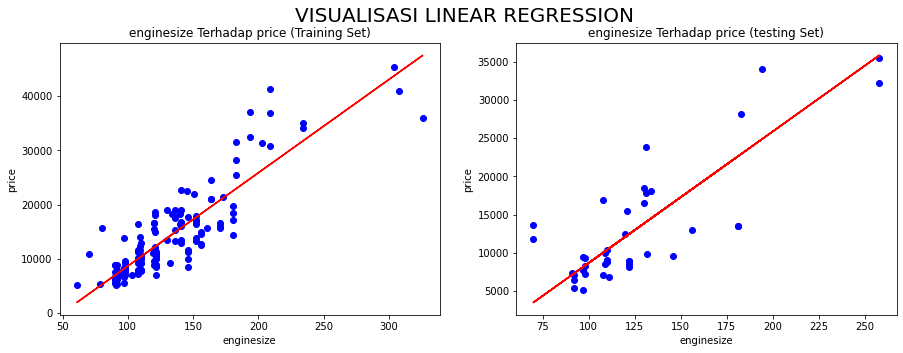

In [15]:
fig, ax = plt.subplots(ncols = 2, figsize = (15,5))

# gambar 1
ax[0].scatter(X_train, y_train, color = 'blue')
ax[0].plot(X_train, model.predict(X_train), color = 'red')
ax[0].set_title('enginesize Terhadap price (Training Set)')
ax[0].set(xlabel = 'enginesize', ylabel = 'price')

# gambar 2
ax[1].scatter(X_test, y_test, color = 'blue')
ax[1].plot(X_test, model.predict(X_test), color = 'red')
ax[1].set_title('enginesize Terhadap price (testing Set)')
ax[1].set(xlabel = 'enginesize', ylabel = 'price')

fig.suptitle('VISUALISASI LINEAR REGRESSION', fontsize = 20)
plt.show()

## 2. Support Vector Regression

## training model

In [16]:
model_linear = SVR(kernel = 'linear')
model_rbf = SVR(kernel = 'rbf')


model_linear.fit(X_train, y_train)
model_rbf.fit(X_train, y_train)

SVR()

## melakukan prediksi

In [17]:
y_pred_linear = model_linear.predict(X_test)
y_pred_rbf = model_rbf.predict(X_test)

## evaluasi

In [18]:
rmse_svc_linear = sqrt(mean_squared_error(y_test, y_pred_linear))
rmse_svc_rbf = sqrt(mean_squared_error(y_test, y_pred_rbf))

print('Nilai RMSE SVC Linear:', round(rmse_svc_linear, 2))
print('Nilai RMSE SVC RBF:', round(rmse_svc_rbf, 2))

Nilai RMSE SVC Linear: 4655.07
Nilai RMSE SVC RBF: 7933.81


## visualisasi hasil

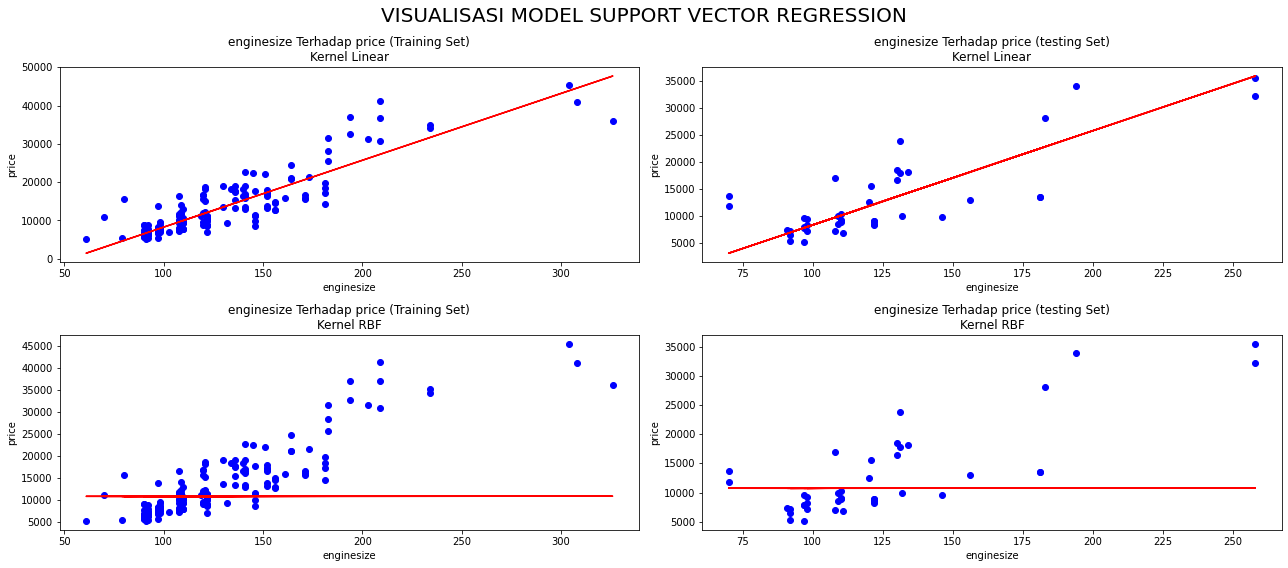

In [19]:
fig, ax = plt.subplots(2,2, figsize = (18,8))

# gambar 1
ax[0,0].scatter(X_train, y_train, color = 'blue')
ax[0,0].plot(X_train, model_linear.predict(X_train), color = 'red')
ax[0,0].set_title('enginesize Terhadap price (Training Set)\nKernel Linear')
ax[0,0].set(xlabel = 'enginesize', ylabel = 'price')

# gambar 2
ax[0,1].scatter(X_test, y_test, color = 'blue')
ax[0,1].plot(X_test, model_linear.predict(X_test), color = 'red')
ax[0,1].set_title('enginesize Terhadap price (testing Set)\nKernel Linear')
ax[0,1].set(xlabel = 'enginesize', ylabel = 'price')

# gambar 3
ax[1,0].scatter(X_train, y_train, color = 'blue')
ax[1,0].plot(X_train, model_rbf.predict(X_train), color = 'red')
ax[1,0].set_title('enginesize Terhadap price (Training Set)\nKernel RBF')
ax[1,0].set(xlabel = 'enginesize', ylabel = 'price')

# gambar 4
ax[1,1].scatter(X_test, y_test, color = 'blue')
ax[1,1].plot(X_test, model_rbf.predict(X_test), color = 'red')
ax[1,1].set_title('enginesize Terhadap price (testing Set)\nKernel RBF')
ax[1,1].set(xlabel = 'enginesize', ylabel = 'price')

fig.suptitle('VISUALISASI MODEL SUPPORT VECTOR REGRESSION', fontsize = 20)
plt.tight_layout()
plt.show()

## 3. KNN Regression

## training model

In [20]:
model_knn = KNeighborsRegressor(n_neighbors = 3)
model_knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

## melakukan prediksi

In [21]:
y_pred_knn = model_knn.predict(X_test)
print(y_pred_knn)

[[28466.66666667]
 [ 7165.        ]
 [ 7520.33333333]
 [ 9911.66666667]
 [17099.        ]
 [ 7520.33333333]
 [ 6715.66666667]
 [ 9911.66666667]
 [ 9855.        ]
 [ 7520.33333333]
 [12555.66666667]
 [ 7165.        ]
 [33652.16666667]
 [ 9855.        ]
 [11050.33333333]
 [ 8818.66666667]
 [ 8001.33333333]
 [38213.33333333]
 [ 6528.33333333]
 [ 6715.66666667]
 [ 8001.33333333]
 [13913.33333333]
 [17099.        ]
 [ 8818.66666667]
 [ 6715.66666667]
 [13913.33333333]
 [13913.33333333]
 [13941.33333333]
 [13644.66666667]
 [13995.66666667]
 [11050.33333333]
 [ 8001.33333333]
 [13913.33333333]
 [ 9911.66666667]
 [ 8818.66666667]
 [13913.33333333]
 [38213.33333333]
 [ 9911.66666667]
 [15276.66666667]
 [ 8818.66666667]
 [ 6715.66666667]]


## evaluasi

In [22]:
rmse_knn = sqrt(mean_squared_error(y_test, y_pred_knn))
print('Nilai RMSE KNN Regression:' , round(rmse_knn, 2))

Nilai RMSE KNN Regression: 3163.52


## visualisasi hasil

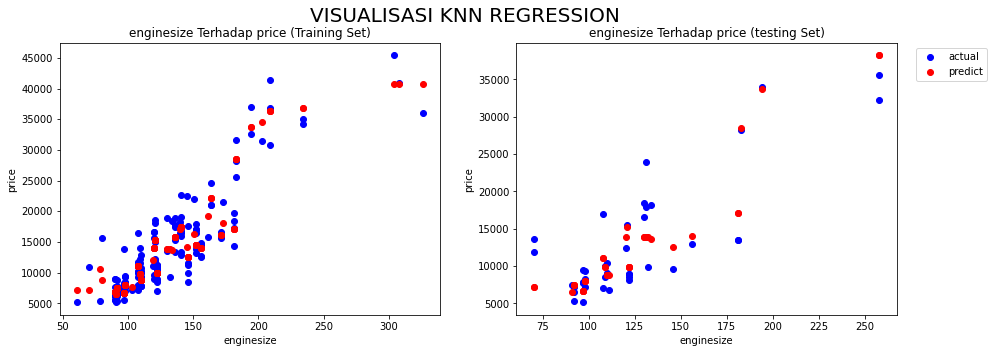

In [23]:
fig, ax = plt.subplots(ncols = 2, figsize = (15,5))

# gambar 1
ax[0].scatter(X_train, y_train, color = 'blue', label = 'actual')
ax[0].scatter(X_train, model_knn.predict(X_train), color = 'red', label = 'predict')
ax[0].set_title('enginesize Terhadap price (Training Set)')
ax[0].set(xlabel = 'enginesize', ylabel = 'price')

# gambar 2
ax[1].scatter(X_test, y_test, color = 'blue', label = 'actual')
ax[1].scatter(X_test, model_knn.predict(X_test), color = 'red', label = 'predict')
ax[1].set_title('enginesize Terhadap price (testing Set)')
ax[1].set(xlabel = 'enginesize', ylabel = 'price')

fig.suptitle('VISUALISASI KNN REGRESSION', fontsize = 20)
plt.legend(loc = 'upper right', bbox_to_anchor=(1.25, 1))
plt.show()

## 4. MLP Regresssion

## training model

In [24]:
model_mlp = MLPRegressor(max_iter = 500, random_state = 1)
model_mlp.fit(X_train, y_train)

MLPRegressor(max_iter=500, random_state=1)

## melakukan prediksi

In [25]:
y_pred_mlp = model_mlp.predict(X_test)
print(y_pred_mlp)

[4545.06700577 1752.47694583 2296.16704599 3037.56263713 4495.64063302
 2296.16704599 2419.73297785 3037.56263713 2716.2912143  2296.16704599
 3630.67911003 1752.47694583 4816.91205585 2716.2912143  2691.57802793
 2741.00440067 2444.44616422 6398.5559836  2271.45385962 2419.73297785
 2444.44616422 3284.69450084 4495.64063302 2741.00440067 2419.73297785
 3235.2681281  3235.2681281  2988.13626438 3334.12087358 3877.81097375
 2691.57802793 2444.44616422 3259.98131447 3037.56263713 2765.71758704
 3259.98131447 6398.5559836  3037.56263713 3012.84945076 2741.00440067
 2419.73297785]


## evaluasi

In [26]:
rmse_mlp = sqrt(mean_squared_error(y_test, y_pred_mlp))
print('Nilai RMSE MLP Regression:' , round(rmse_mlp, 2))

Nilai RMSE MLP Regression: 11982.39


## visualisasi hasil

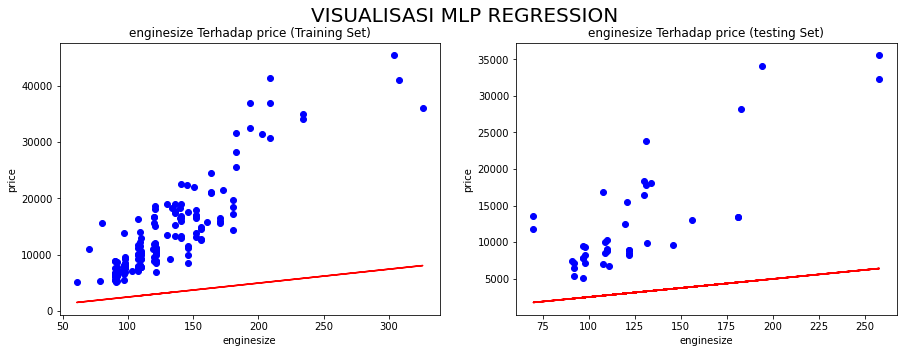

In [27]:
fig, ax = plt.subplots(ncols = 2, figsize = (15,5))

# gambar 1
ax[0].scatter(X_train, y_train, color = 'blue')
ax[0].plot(X_train, model_mlp.predict(X_train), color = 'red')
ax[0].set_title('enginesize Terhadap price (Training Set)')
ax[0].set(xlabel = 'enginesize', ylabel = 'price')

# gambar 2
ax[1].scatter(X_test, y_test, color = 'blue')
ax[1].plot(X_test, model_mlp.predict(X_test), color = 'red')
ax[1].set_title('enginesize Terhadap price (testing Set)')
ax[1].set(xlabel = 'enginesize', ylabel = 'price')

fig.suptitle('VISUALISASI MLP REGRESSION', fontsize = 20)
plt.show()

# Membuat Dataframe Perbandingan Actual dan Prediksi

In [28]:
new_df = pd.DataFrame({
    'actual' : df['price'],
    'linear_regr' : model.predict(X).flatten(),
    'svr_linear' : model_linear.predict(X).flatten(),
    'svr_rbf' : model_rbf.predict(X).flatten(),
    'knn_regr' : model_knn.predict(X).flatten(),
    'mlp_regr' : model_mlp.predict(X).flatten()
})

new_df

,actual,linear_regr,svr_linear,svr_rbf,knn_regr,mlp_regr
0,13495.0,13821.474626,13494.900000,10771.198519,13913.333333,3235.268128
1,16500.0,13821.474626,13494.900000,10771.198519,13913.333333,3235.268128
2,16500.0,17607.333109,17338.994737,10799.269266,14520.000000,3778.958228
3,13950.0,10207.700619,9825.536842,10734.833986,9855.000000,2716.291214
4,17450.0,14853.981485,14543.289474,10781.125187,15821.666667,3383.547246
...,...,...,...,...,...,...
200,16845.0,15714.403867,15416.947368,10788.264977,17518.333333,3507.113178
201,19045.0,15714.403867,15416.947368,10788.264977,17518.333333,3507.113178
202,21485.0,21221.107116,21008.357895,10802.716589,18013.666667,4297.935142
203,22470.0,16402.741774,16115.873684,10793.055702,14156.000000,3605.965924


# Analisa dan Kesimpulan

|Model|RMSE|
|-----|-----|
|Linear Regression|4624.35|
|SVR Kernel Linear|4655.07|
|SVR Kernel RBF|7933.81|
|KNN Regression|23163.52|
|MLP Regression|11982.39|

Dari 5 model yang dicoba dalam melakukan prediksi, model `KNN Regression` memiliki hasil yang lebih baik karena nilai errornya paling kecil diantara semua model. Selanjutnya untuk model Support Vector Regression dengan kernel Linear memiliki hasil yang jauh lebih baik dibanding dengan Support Vector Regression kernel RBF. Hal ini dikarenakan data yang dimiliki merupakan data linear sehingga kernel `linear` lebih baik dari kernel `rbf` untuk kasus ini.